# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


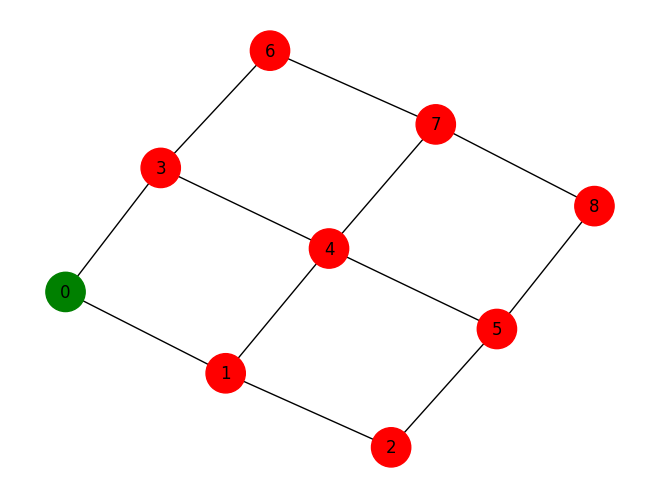

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=num_qubits)

                                          ┌───┐      ┌───┐                  »
q_0: ──────────────────────────────X──────┤ X ├─■──■─┤ S ├──■─────────■─────»
                                   │ ┌───┐└─┬─┘ │  │ └───┘  │         │     »
q_1: ───────────────────────────■──┼─┤ Y ├──┼───┼──┼────────┼─────────┼─────»
                                │  │ └───┘  │   │  │ ┌───┐┌─┴─┐┌───┐  │     »
q_2: ───────────────────X───────┼──┼────────┼───■──■─┤ X ├┤ X ├┤ X ├──┼───X─»
                  ┌───┐ │ ┌───┐ │  │        │        └─┬─┘└───┘└───┘┌─┴─┐ │ »
q_3: ───────────X─┤ S ├─┼─┤ Z ├─┼──X────────■──────────■────────────┤ X ├─┼─»
     ┌───┐┌───┐ │ └───┘ │ └───┘ │                                   └───┘ │ »
q_4: ┤ Z ├┤ X ├─X───────X───────■─────────────────────────────────────────X─»
     └───┘└───┘                                                             »
«                    ┌───┐┌───┐           
«q_0: ──■────────────┤ X ├┤ S ├───────────
«       │            └─┬─┘└───┘           
«q_1: ──┼────

2024-11-28 16:25:15,001: Circuito aleatório gerado com 5 qubits e 30 portas. Instruções sobre o circuito.
2024-11-28 16:25:15,002: Instrução: {'operation': 'z', 'qubits': [4]}
2024-11-28 16:25:15,002: Instrução: {'operation': 'x', 'qubits': [4]}
2024-11-28 16:25:15,002: Instrução: {'operation': 'swap', 'qubits': [3, 4]}
2024-11-28 16:25:15,004: Instrução: {'operation': 's', 'qubits': [3]}
2024-11-28 16:25:15,004: Instrução: {'operation': 'z', 'qubits': [3]}
2024-11-28 16:25:15,005: Instrução: {'operation': 'swap', 'qubits': [3, 0]}
2024-11-28 16:25:15,006: Instrução: {'operation': 'swap', 'qubits': [4, 2]}
2024-11-28 16:25:15,006: Instrução: {'operation': 'cx', 'qubits': [3, 0]}
2024-11-28 16:25:15,006: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-11-28 16:25:15,006: Instrução: {'operation': 'cz', 'qubits': [0, 2]}
2024-11-28 16:25:15,006: Instrução: {'operation': 's', 'qubits': [0]}
2024-11-28 16:25:15,006: Instrução: {'operation': 'cz', 'qubits': [4, 1]}
2024-11-28 16:25:15,

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=5)

     ┌───┐┌───┐             ┌───┐   ┌───┐┌───┐┌───┐                        »
q_0: ┤ X ├┤ T ├───────────■─┤ Y ├───┤ X ├┤ X ├┤ S ├──────────────X─────────»
     ├───┤└───┘           │ └───┘   └─┬─┘└───┘└───┘┌───┐         │ ┌───┐   »
q_1: ┤ H ├──■────■────────┼───■───────┼─────────■──┤ H ├──■───X──┼─┤ X ├─X─»
     ├───┤┌─┴─┐  │        │   │       │  ┌───┐  │  └───┘  │   │  │ └───┘ │ »
q_2: ┤ X ├┤ X ├──┼────────┼───┼───■───■──┤ S ├──┼─────────■───X──┼───────X─»
     ├───┤├───┤  │  ┌───┐ │   │   │      └───┘  │  ┌───┐┌───┐    │         »
q_3: ┤ Y ├┤ T ├──┼──┤ X ├─┼───■───┼───■─────────┼──┤ X ├┤ T ├────X─────────»
     └───┘└───┘┌─┴─┐└───┘ │       │   │         │  └─┬─┘└───┘              »
q_4: ──────────┤ X ├──────■───────■───■─────────■────■─────────────────────»
               └───┘                                                       »
«                  
«q_0: ──────■──────
«     ┌───┐ │ ┌───┐
«q_1: ┤ Z ├─┼─┤ S ├
«     └───┘ │ └───┘
«q_2: ──────■──────
«                  
«q_3: ───────

2024-11-28 16:25:15,312: Circuito aleatório gerado com 5 qubits e 30 portas. Instruções sobre o circuito.
2024-11-28 16:25:15,313: Instrução: {'operation': 'y', 'qubits': [3]}
2024-11-28 16:25:15,313: Instrução: {'operation': 'x', 'qubits': [2]}
2024-11-28 16:25:15,314: Instrução: {'operation': 'x', 'qubits': [0]}
2024-11-28 16:25:15,314: Instrução: {'operation': 'h', 'qubits': [1]}
2024-11-28 16:25:15,314: Instrução: {'operation': 'cx', 'qubits': [1, 2]}
2024-11-28 16:25:15,315: Instrução: {'operation': 't', 'qubits': [3]}
2024-11-28 16:25:15,315: Instrução: {'operation': 't', 'qubits': [0]}
2024-11-28 16:25:15,315: Instrução: {'operation': 'cx', 'qubits': [1, 4]}
2024-11-28 16:25:15,316: Instrução: {'operation': 'cz', 'qubits': [4, 0]}
2024-11-28 16:25:15,316: Instrução: {'operation': 'cz', 'qubits': [2, 4]}
2024-11-28 16:25:15,317: Instrução: {'operation': 'y', 'qubits': [0]}
2024-11-28 16:25:15,317: Instrução: {'operation': 'x', 'qubits': [3]}
2024-11-28 16:25:15,318: Instrução: {'

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [5]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.9445


0.944479100319392

##### Além de printar as fidelidades das rotas.

In [6]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.9238
0.9676
0.9835
0.9498
0.9035
0.9227
0.9664
0.9824
0.9486
0.9024
0.9504
0.9133
0.9856
0.9052
0.9619


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [7]:
#rede.application_layer.print_used_eprs()

In [8]:
rede.get_total_useds_eprs()

2024-11-28 16:25:15,564: Eprs usados na camada PhysicalLayer: 0
2024-11-28 16:25:15,565: Eprs usados na camada LinkLayer: 0
2024-11-28 16:25:15,565: Eprs usados na camada NetworkLayer: 0
2024-11-28 16:25:15,567: Eprs usados na camada ApplicationLayer: 30


30

In [9]:
#taxadesucesso